# Tsna plot

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

import pickle

with open("/home/houcem/BILIM/AGMP/data/pipline_agmp_data/positive.pkl", "rb") as f:   # rb = read-binary
    positive = pickle.load(f)

with open("/home/houcem/BILIM/AGMP/data/pipline_agmp_data/negative.pkl", "rb") as f:   # rb = read-binary
    negative = pickle.load(f)

with open("/home/houcem/BILIM/AGMP/data/pipline_agmp_data/negative_filtered.pkl", "rb") as f:   # rb = read-binary
    negative_filtered = pickle.load(f)

positive=positive[0]
negative = negative[0]
negative_filtered = negative_filtered[0]


processed_data = positive+negative
labels = len(positive)*[1]+len(negative)*[0]

processed_data_filtered = positive+negative_filtered
labels_filtered = len(positive)*[1]+len(negative_filtered)*[0]

In [7]:
def tsne_plot(texts):
    # Step 0: Convert list of tokenized texts -> numeric sparse matrix
    vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)
    X = vectorizer.fit_transform(texts)

    # Step 1: Reduce dimensionality with TruncatedSVD
    svd = TruncatedSVD(n_components=20, random_state=42)
    X_reduced = svd.fit_transform(X)

    # Step 2: Apply t-SNE on reduced data
    tsne = TSNE(n_components=2, init="pca", perplexity=30, n_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X_reduced)

      

    print("Original shape:", X.shape)
    print("Reduced shape:", X_reduced.shape)
    print("t-SNE output shape:", X_tsne.shape)

    return X_tsne

tsn_unfiltered = tsne_plot(processed_data)
tsn_filtered = tsne_plot(processed_data_filtered)

Original shape: (47569, 115)
Reduced shape: (47569, 20)
t-SNE output shape: (47569, 2)


/home/houcem/miniforge3/envs/data_env/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Original shape: (47533, 115)
Reduced shape: (47533, 20)
t-SNE output shape: (47533, 2)


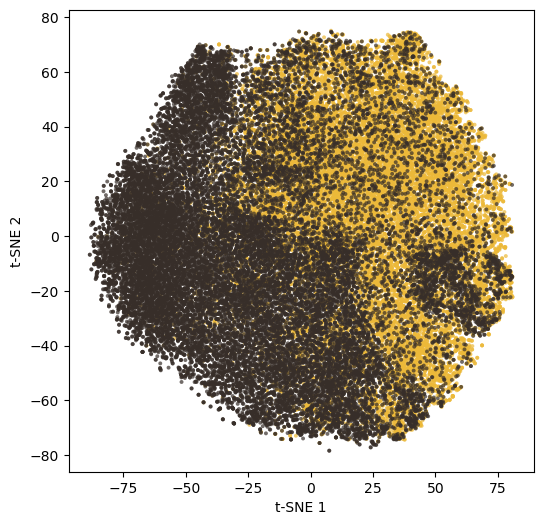

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define 2 colors
cmap = ListedColormap(["#372e29", "#ecb939"])  # blue and orange as example

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(
    tsn_unfiltered[:, 0], tsn_unfiltered[:, 1],
    c=labels,
    cmap=cmap,      # use our custom 2-color map
    s=8,
    alpha=0.7,
    edgecolors="none"
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()



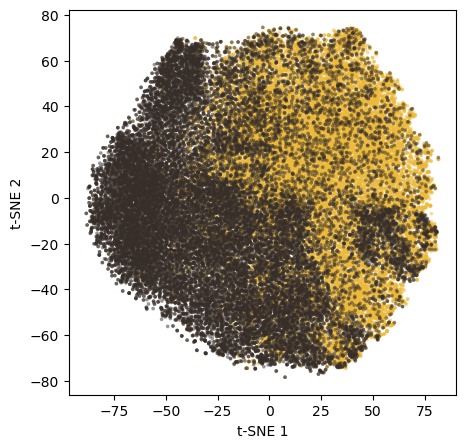

In [9]:
# Step 3: Plot results
plt.figure(figsize=(5, 5))
plt.scatter(
    tsn_filtered[:, 0], tsn_filtered[:, 1],
    c=labels_filtered, cmap=cmap, s=7, alpha=0.5, edgecolors="none"
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [11]:
# Step 3: Plot results
plt.figure(figsize=(4, 4))
plt.scatter(
    tsn_filtered[:, 1], tsn_unfiltered[:, 2],
    c=labels_filtered, cmap=cmap, s=20, alpha=0.7, edgecolors="none"
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 400x400 with 0 Axes>

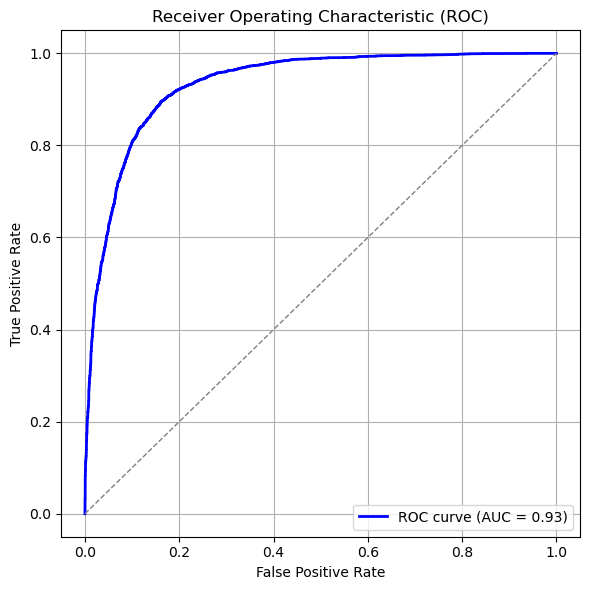

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load your CSV
df = pd.read_csv("/home/houcem/BILIM/AGMP/data/pipline_agmp_data/probability_data_4roc.csv")

# Extract columns
y_test = df["y_test"]
y_proba = df["y_proba"]   # probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1)  # diagonal line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## Confusion matrix metrics as a function of the decision threshold

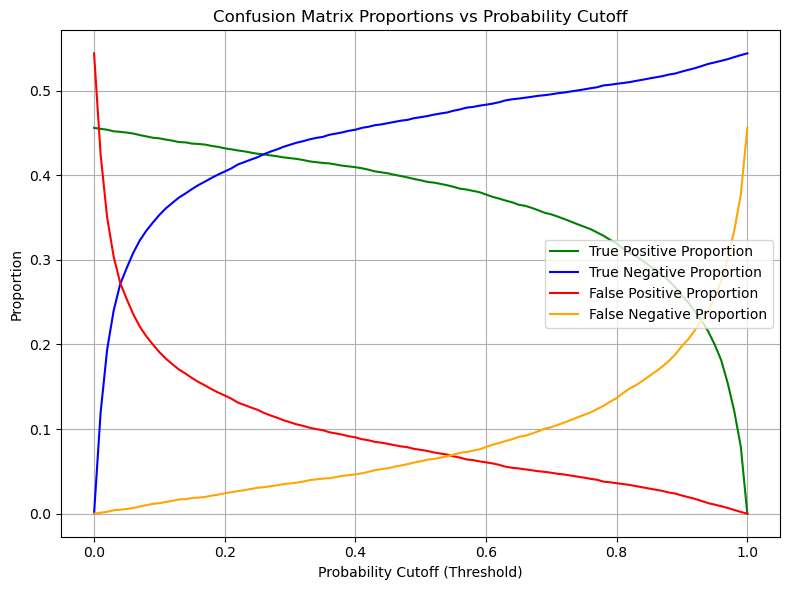

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load your CSV
df = pd.read_csv("/home/houcem/BILIM/AGMP/data/pipline_agmp_data/probability_data_4roc.csv")

y_true = df["y_test"].values
y_proba = df["y_proba"].values

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 101)

# Store results
tp_rates, fp_rates, tn_rates, fn_rates = [], [], [], []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total = tn + fp + fn + tp
    
    tp_rates.append(tp / total)
    fp_rates.append(fp / total)
    tn_rates.append(tn / total)
    fn_rates.append(fn / total)

# Plot
plt.figure(figsize=(8,6))
plt.plot(thresholds, tp_rates, label="True Positive Proportion", color="green")
plt.plot(thresholds, tn_rates, label="True Negative Proportion", color="blue")
plt.plot(thresholds, fp_rates, label="False Positive Proportion", color="red")
plt.plot(thresholds, fn_rates, label="False Negative Proportion", color="orange")

plt.xlabel("Probability Cutoff (Threshold)")
plt.ylabel("Proportion")
plt.title("Confusion Matrix Proportions vs Probability Cutoff")
plt.legend(loc="center right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load CSV
df = pd.read_csv("/home/houcem/BILIM/AGMP/data/pipline_agmp_data/probability_data_4roc.csv")
y_true = df["y_test"].values
y_proba = df["y_proba"].values

def classify_proportions(cutoff, y_true=y_true, y_proba=y_proba):
    """
    Given a probability cutoff, returns:
    - Proportion of wrongly classified class 1 (false negatives among all class 1)
    - Proportion of correctly classified class 0 (true negatives among all class 0)
    """
    y_pred = (y_proba >= cutoff).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Total number of each class
    total_class1 = fn + tp
    total_class0 = tn + fp
    
    # Proportions
    prop_wrong_class1 = fn / total_class1 if total_class1 > 0 else 0
    prop_correct_class0 = tn / total_class0 if total_class0 > 0 else 0
    print(f"At cutoff {cutoff}:")
    print(f"Proportion of wrongly classified class 1 = {prop_wrong_class1:.2f}")
    print(f"Proportion of correctly classified class 0 = {prop_correct_class0:.2f}")
    
    return prop_wrong_class1, prop_correct_class0

# Example usage
cutoff = 0.5
prop_fn, prop_tn = classify_proportions(cutoff)



At cutoff 0.5:
Proportion of wrongly classified class 1 = 0.14
Proportion of correctly classified class 0 = 0.86


In [15]:
classify_proportions(0.5)

At cutoff 0.5:
Proportion of wrongly classified class 1 = 0.14
Proportion of correctly classified class 0 = 0.86


(np.float64(0.1358708189158016), np.float64(0.861368909512761))

In [16]:
classify_proportions(0.4)

At cutoff 0.4:
Proportion of wrongly classified class 1 = 0.10
Proportion of correctly classified class 0 = 0.83


(np.float64(0.10196078431372549), np.float64(0.834106728538283))

In [17]:
classify_proportions(0.3)

At cutoff 0.3:
Proportion of wrongly classified class 1 = 0.08
Proportion of correctly classified class 0 = 0.80


(np.float64(0.0784313725490196), np.float64(0.801430781129157))

In [18]:
x ={}
y={}

for data in {0.1, 0.2, 0.3, 0.4, 0.5}:
    fn, tn = classify_proportions(data)

At cutoff 0.1:
Proportion of wrongly classified class 1 = 0.03
Proportion of correctly classified class 0 = 0.65
At cutoff 0.4:
Proportion of wrongly classified class 1 = 0.10
Proportion of correctly classified class 0 = 0.83
At cutoff 0.2:
Proportion of wrongly classified class 1 = 0.05
Proportion of correctly classified class 0 = 0.74
At cutoff 0.3:
Proportion of wrongly classified class 1 = 0.08
Proportion of correctly classified class 0 = 0.80
At cutoff 0.5:
Proportion of wrongly classified class 1 = 0.14
Proportion of correctly classified class 0 = 0.86


Optimal cutoff: 0.41
Proportion of wrongly classified class 1 = 0.10
Proportion of correctly classified class 0 = 0.84


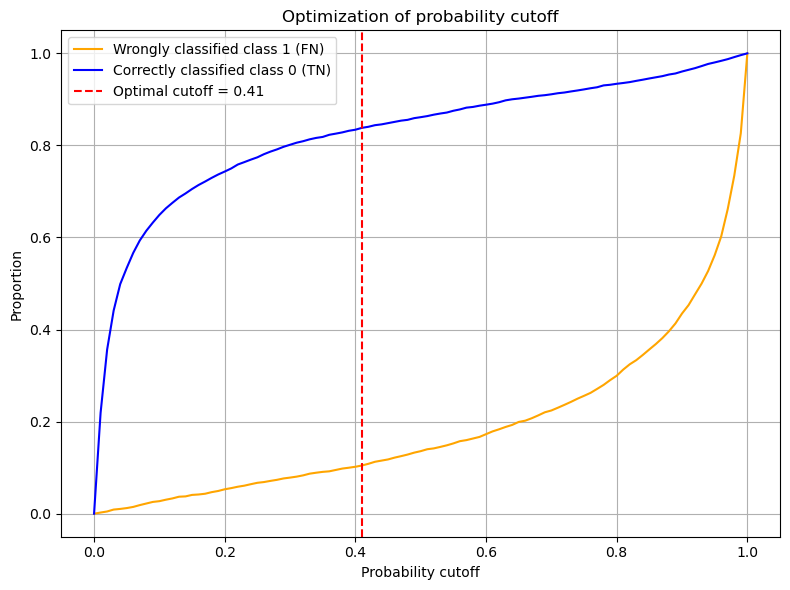

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/home/houcem/BILIM/AGMP/data/pipline_agmp_data/probability_data_4roc.csv")
y_true = df["y_test"].values
y_proba = df["y_proba"].values

def proportions(cutoff, y_true=y_true, y_proba=y_proba):
    """Compute proportions for a given cutoff"""
    y_pred = (y_proba >= cutoff).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_class1 = fn + tp
    total_class0 = tn + fp
    prop_wrong_class1 = fn / total_class1 if total_class1 > 0 else 0
    prop_correct_class0 = tn / total_class0 if total_class0 > 0 else 0
    return prop_wrong_class1, prop_correct_class0

# Sweep thresholds
thresholds = np.linspace(0, 1, 101)
scores = []
props_fn = []
props_tn = []

for t in thresholds:
    prop_fn, prop_tn = proportions(t)
    props_fn.append(prop_fn)
    props_tn.append(prop_tn)
    # Combined score: maximize TN proportion, minimize FN proportion
    score = prop_tn - prop_fn
    scores.append(score)

# Find optimal threshold
best_idx = np.argmax(scores)
best_cutoff = thresholds[best_idx]
best_fn = props_fn[best_idx]
best_tn = props_tn[best_idx]

print(f"Optimal cutoff: {best_cutoff:.2f}")
print(f"Proportion of wrongly classified class 1 = {best_fn:.2f}")
print(f"Proportion of correctly classified class 0 = {best_tn:.2f}")

# Optional: plot
plt.figure(figsize=(8,6))
plt.plot(thresholds, props_fn, label="Wrongly classified class 1 (FN)", color="orange")
plt.plot(thresholds, props_tn, label="Correctly classified class 0 (TN)", color="blue")
plt.axvline(best_cutoff, color="red", linestyle="--", label=f"Optimal cutoff = {best_cutoff:.2f}")
plt.xlabel("Probability cutoff")
plt.ylabel("Proportion")
plt.title("Optimization of probability cutoff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
